<div>
<img src="figures/svtLogo.png"/>
</div>

<center><h1>Mathematical Optimization for Engineers</h1></center>
<center><h2>Lab 6 - The Simplex Method</h2></center>

Consider the following optimization problem:

$$\min_{x_1,x_2} \quad \quad x_1+x_2$$

$$\begin{aligned}
\mbox{s.t. }\quad 0 \; \leq \; x_1 \; &\leq \; 1\\
0 \; \leq \; x_2 \; &\leq \; 1\\
x_1+x_2 \; &\leq \; 1.5\\
\end{aligned}$$

<u>Task 1</u>: Sketch the feasible region for this problem. Where is the optimal solution?

(-0.5, 1.5)

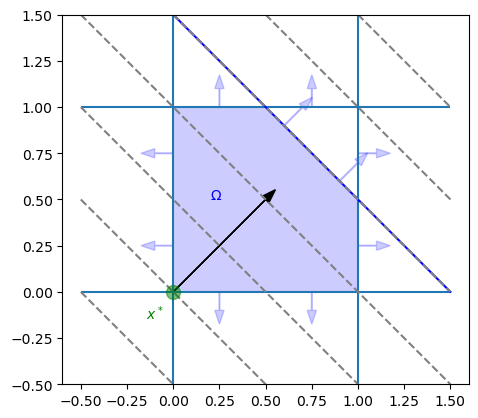

In [48]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

%matplotlib inline

x1 = np.linspace(-0.5,1.5,100)

# the function, which is y = x^2 here
x2 = x_1**2-2
c3 = 1.5-x1

objectives = [i-x1 for i in np.arange(-2, 4, 0.5)]


fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
plt.text(0.2, 0.5, r'$\Omega$', color='blue')

plt.hlines([0, 1], -0.5, 1.5)
plt.vlines([0, 1], -0.5, 1.5)
plt.plot(x1, c3, color='blue')
p = Polygon([[0,0], [0, 1], [0.5, 1], [1, 0.5], [1, 0]], facecolor = 'blue', alpha=0.2)

ax.add_patch(p)

for obj in objectives:
    plt.plot(x1, obj, linestyle="--", color="gray")

plt.plot(0, 0, marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green", alpha=0.5)
plt.text(-0.15, -0.15, r'$x^*$', color='green')

plt.arrow(0, 0, 0.5, 0.5, head_width = 0.05, width = 0.001, color="black", ec ='black')

plt.arrow(0.25, 0, 0, -0.1, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(0.75, 0, 0, -0.1, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(0.25, 1, 0, 0.1, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(0.75, 1, 0, 0.1, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(0, 0.25, -0.1, 0, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(0, 0.75, -0.1, 0, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(1, 0.25, 0.1, 0, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(1, 0.75, 0.1, 0, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(0.6, 0.9, 0.1, 0.1, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
plt.arrow(0.9, 0.6, 0.1, 0.1, head_width = 0.05, width = 0.005, color="blue", alpha=0.2)
    
plt.ylim(-0.5, 1.5)

<u>Task 2</u>: Introduce slack variables and reformulate the optimization problem into standard form:

$$\begin{aligned}
\min_{\bar{\mathbf x}} \quad \bar{\mathbf{d}}^{T} \bar{\mathbf x} \\
\mbox{s.t.} \quad \bar{\mathbf A} \bar{\mathbf x} &= \bar{\mathbf b} \\
\bar{\mathbf x} &\geq \mathbf{0}
\end{aligned}$$

$$\begin{aligned}
\min_{\bar{\mathbf x}} & \begin{bmatrix}1 \\ 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} \begin{bmatrix}x_1 & x_2 & v_1 & v_2 & v_3 \end{bmatrix}\\
\mbox{s.t.} & \begin{bmatrix}
1 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 1 & 0 \\
1 & 1 & 0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ v_1 \\ v_2 \\ v_3 \end{bmatrix} = 
\begin{bmatrix}  1 \\ 1 \\ 1.5\end{bmatrix} \\
& \begin{bmatrix} x_1 \\ x_2 \\ v_1 \\ v_2 \\ v_3 \end{bmatrix} \geq 
\begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\end{aligned}$$

<u>Task 3</u>: Determine the values of $\bar{\mathbf x}$ for the points $\mathbf x=(0,1)^T$, $\mathbf x=(1,0.5)^T$, and $\mathbf x=(0,0)^T$. What are the corresponding basic matrices $\mathbf{B}$?

for $\mathbf{x}=(0, 1)^T \Leftrightarrow \bar{\mathbf x} = (0, 1, 1, 0, 0.5)^T$
and 
$\mathbf{B} = \begin{bmatrix} 0 & 1 & 0 & 1 & 0 \\ 1 & 0 & 0 & 0 & 1 \\ 1 & 0 & 1 & 1 & 0 \\\end{bmatrix}$

for $\mathbf{x}=(1, 0.5)^T \Leftrightarrow \bar{\mathbf x} = (1, 0.5, 0, 0.5, 0)^T$
and 
$\mathbf{B} = \begin{bmatrix} 1 & 0 & 0 & 1 & 0 \\ 0 & 1 & 1 & 0 & 0 \\ 1 & 1 & 0 & 0 & 1\\\end{bmatrix}$

for $\mathbf{x}=(0, 0)^T \Leftrightarrow \bar{\mathbf x} = (0, 0, 1, 1, 1.5)^T$
and
$\mathbf{B} = \begin{bmatrix} 1 & 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 & 1 \\ 0 & 0 & 1 & 1 & 1\end{bmatrix}$

<u>Task 4</u>: Answer the following:

1. How does the Simplex method work?
<br>
<br>
2. How do we know, if the current corner point is the optimal one? Which condition has to hold? Derive it from the KKT conditions.
<br>
<br>
3. If we have not found the optimal corner point yet: which column has to be included into the basis matrix $\mathbf {B}$? Which column must be excluded from $\mathbf {B}$?

1. The simplex method works by starting from an initial point on a corner of the feasible set. If all KKT conditions are met, we are at a minimal point. If not, we move in the direction with the highest gradient towards a next corner point. This is repeated until we reach the minimal point.

2. All $\lambda$ values should $\geq 0$

<b>We will now implement the Simplex method in Python. </b>

At the outset, let's declare the matrices we have defined in the exercise above:

In [49]:
import numpy as np
from numpy.linalg import inv
from numpy.matlib import matrix

# equality constraints LHS
A = np.matrix([[1,0,1,0,0], [0,1,0,1,0], [1,1,0,0,1]])
# equality constraints RHS
b = np.array([1, 1, 1.5])
# objective
d = np.array([1, 1, 0, 0, 0])

The Simplex method needs a <u>feasible corner point</u> to start with. We do not cover in this course, how such a point is found. Here, we are able to guess one because the problem is small.

In [50]:
# initial point
x_init = np.array([1,0.5,0,0.5,0])
# corresponding initial Basic Feasible Set 
# (note that indexing in Python starts from 0)
basic_init = [0,1,3]

We will now implement the following pseudo-code, that we saw in the lecture:
<br>
<br>
While not($\lambda_{I,N} \geq \mathbf 0$)
1. Choose an index $q \notin T^k(\mathbf x)$ such that $$q = \underset{i \notin T^k(\mathbf x)}{\operatorname{argmin}}\mathbf \lambda_{I,i}$$
<br>
$$\mathbf \lambda_{I,q} = \underset{i \notin T^k(\mathbf x)}{\operatorname{min}}\mathbf \lambda_{I,i}$$
<br>
2. Increase $x_q$, following $\mathbf A \mathbf x^+ = \mathbf b$, until some $x_p^+$ with $p \in T(\mathbf x)$ becomes zero. <br>
<br>
$$\implies x_q^+ = \underset{i \in T^k(\mathbf x)|(\mathbf B^{-1} \mathbf A_q)_i \gt 0}{\operatorname{min}} (\mathbf x_B)_i/(\mathbf B^{-1} \mathbf A_q)_i$$
<br>
$$\implies p = \underset{i \in T^k(\mathbf x)|(\mathbf B^{-1} \mathbf A_q)_i \gt 0}{\operatorname{argmin}} (\mathbf x_B)_i/(\mathbf B^{-1} \mathbf A_q)_i$$
<br>
3. Update $\mathbf x$, basic set and non-basic set.$$\mathbf x_B^{+} = \mathbf x_B - \mathbf B^{-1} \mathbf A_q x_q^+ $$
<br>
<br>
<i>Note that we are working with LP notation in <u>standard form</u>, even though we have dropped the bars for the sake of clarity.</i>

Let us now write the core function. Our implementation takes the follwoing as inputs:

1. Matrix $\bar{\mathbf A}$ 
2. Cost vector $\bar{\mathbf d}$  
3. An initial point 
4. The corresponding initial Basic Feasible Set 

It returns the following:

1. Optimal value of $\bar{\mathbf x}$ 
2. The corresponding Basic Feasible Set
3. The optimal cost

In [51]:
def simplex_method(A: matrix, c: np.array, x: np.array, basic: list):
    
    # clear all
    lambda_i_q, q, p, x_q_plus = None, None, None, None
    
    m, n = A.shape[0], A.shape[1]  # no. of rows, columns of A, respectively
    nonbasic = set(range(n)) -set(basic)  # Non-basic index set
    
    obj = np.dot(c, x)  # Value of obj. function
    
    optimum = False # boolean for termination
    iter = 1 # iteration counter
    
    
    # main iterative loop
    
    while not optimum:
        
        # inverse of basic matrix - can be made efficient by updating B_inv
        # instead of recomputing in each iteration
        B_inv = inv(A[:, basic])
        
        # step 1: choose index q by Dantzig's rule
        lambda_i_q, q = min([((c[q] - c[basic]*B_inv* A[:,q]).item(), q) for q in nonbasic],
                         key=(lambda tup: tup[0]))
        
        optimum = (lambda_i_q >= 0)
        
        if optimum:
            print("\tfound optimum")
            return x, set(basic), obj  # Found optimal solution
        
        # step 2: calculate leaving index p and x_q_plus
        
        x_q_plus, p = min([(x[basic][i] / (B_inv[i, :]*A[:, q]).item(), i) for i in range(m) if (B_inv[i, :]*A[:, q]).item() > 0], key=(lambda tup: tup[0]))
        
        # step 3: update x
        
        x[basic] = x[basic] - x_q_plus*np.array([(B_inv[i, :] * A[:, q]).item() for i in range(m)])
        x[q] = x_q_plus
        assert x[basic][p] == 0
        
        obj = obj + x_q_plus*lambda_i_q
        
        nonbasic = nonbasic - {q} | {basic[p]}
        basic = list(set(range(n)) - nonbasic)
        
        # print iteration log
        
        print(
            "Iteration {}: \tq = {:d} \tlambda_i_q = {:.2f} \tp = {:d} \tx_q_plus = {:.4f} \tobj = {:.2f}"
                .format(iter, q+1, lambda_i_q, p+1, x_q_plus, obj)
        )
        
        print("x = {}\n".format(x))
        
        iter += 1
        
        # end loop

In [52]:
print("Iteration {}:".format(0))
print("x0 = {}\n".format(x_init))

xopt, basic, obj = simplex_method(A, d, x_init, basic_init)

Iteration 0:
x0 = [1.  0.5 0.  0.5 0. ]

Iteration 1: 	q = 5 	lambda_i_q = -1.00 	p = 2 	x_q_plus = 0.5000 	obj = 1.00
x = [1.  0.  0.  1.  0.5]

Iteration 2: 	q = 3 	lambda_i_q = -1.00 	p = 1 	x_q_plus = 1.0000 	obj = 0.00
x = [0.  0.  1.  1.  1.5]

	found optimum


### Geometrical interpretation

Geometrically speaking, the Simplex method moves along an edge of the feasible polytope that decreases $\mathbf c^T \mathbf x$. It continues to move along this edge until a new vertex is encountered. At this vertex, a new constraint $x_p \ge 0$ must have become active, that is, one of the components $x_p, p \in T(\mathbf x)$, has decreased to zero. We then remove this index $p$ from the basis $T(\mathbf x)$ and replace it by $q$.

By looking at the figure below, we can tell that at the initial point, $\mathbf x^0$, the constraints $x_5 \ge 0$ and $x_3 \ge 0$ are active. The optimizer picks $q=5$ as the entering index (as per Dantzig's rule) and $p=2$ as the leaving index. Note that at the the first iterate, $\mathbf x^1$, the constraints $x_2 \ge 0$ and $x_3 \ge 0$ are active.

Convince yourself that the above applies to the second step as well!
<br>
<br>
<div>
<img src="figures/step.png" width="400"/>
</div>
<br>
<br>
This is the reason that Simplex method is called an active-set method - it approches the minimum via the boundary of the feasible set.